# Problema 2
Descripción:
El objetivo de este ejercicio es implementar un sistema de clasificación de gestos de "piedra", "papel" o "tijeras" utilizando MediaPipe para la detección de las manos y una red neuronal densa para realizar la clasificación. El ejercicio se dividirá en tres partes, cada una implementada en un script de Python.

Doc de MediaPipe para detección de landmarks:

https://ai.google.dev/edge/mediapipe/solutions/vision/hand_landmarker

## Objetivo:
- 1) Grabación del dataset de gestos: En esta primera parte, se implementará un script llamado record-dataset.py, que permitirá grabar un dataset de gestos utilizando la cámara web y MediaPipe para detectar los landmarks (puntos clave) de la mano. Cada gesto se etiquetará como "piedra" (0), "papel" (1) o "tijeras" (2) y se almacenará junto con sus coordenadas en archivos .npy.

- 2) Entrenamiento del clasificador de gestos: En esta segunda parte, se implementará un script llamado train-gesture-classifier.py, donde se entrenará una red neuronal densa utilizando los datos de los landmarks obtenidos en la primera parte. El modelo resultante será capaz de clasificar los gestos basándose en las posiciones de los puntos clave de la mano.

- 3) Prueba del sistema completo: En la tercera parte, se implementará un script llamado rock-paper-scissors.py, que tomará como entrada la imagen de la cámara web, utilizará MediaPipe para detectar los landmarks de la mano, y clasificará el gesto en "piedra", "papel" o "tijeras" utilizando el modelo entrenado.

## Tareas:

- Script 1: Grabación del dataset (record-dataset.py)
    - Usar la cámara web para capturar imágenes de la mano.
    - Utilizar MediaPipe para detectar los landmarks de la mano (21 puntos clave con coordenadas x y y).
    - Almacenar las coordenadas de los landmarks junto con la etiqueta correspondiente (0 para "piedra", 1 para "papel", 2 para "tijeras") en archivos .npy (por ejemplo, rps_dataset.npy y rps_labels.npy).

- Script 2: Entrenamiento del clasificador (train-gesture-classifier.py)
    - Cargar los datos del dataset grabado en la primera parte.
    - Implementar una red neuronal densa que tome como entrada las coordenadas x y y de los 21 puntos clave (un total de 42 entradas).
    - Entrenar la red para clasificar los gestos en "piedra", "papel" o "tijeras" usando el dataset.
    - Guardar el modelo entrenado en un archivo (por ejemplo, rps_model.h5).

- Script 3: Prueba del sistema completo (rock-paper-scissors.py)
    - Cargar el modelo entrenado.
    - Capturar imágenes de la cámara web en tiempo real.
    - Usar MediaPipe para detectar los landmarks y alimentar estos datos al modelo para clasificar el gesto.
    - Mostrar el gesto reconocido en pantalla.



## Script 1

### Librerias

In [3]:
%pip install -q opencv-python

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\Users\\Ignacio González\\Desktop\\unr\\3A - 1C\\AA2\\TPs-AA2\\.venv\\Lib\\site-packages\\cv2\\cv2.pyd'
Check the permissions.



In [1]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2
import time
import os
import urllib.request
import numpy as np

### Grabar de imágenes

In [ ]:
webcam = cv2.VideoCapture(0)
counter = 1

print("--- Instrucciones ---")
print("Presiona 's' para guardar una foto.")
print("Presiona 'q' para salir.")

while True:
    try:
        check, frame = webcam.read()
        if not check:
            print("No se pudo capturar el frame.")
            break

        cv2.imshow("Capturando (Presiona 's' para guardar, 'q' para salir)", frame)

        key = cv2.waitKey(1)

        if key == ord('s'): 
            dir = f"./fotos/piedra"
            filename = f"{dir}/piedra_{counter}.jpg"
            os.makedirs(dir, exist_ok=True)
            cv2.imwrite(filename, frame)
            print(f"Foto guardada como: {filename}")
            counter += 1 

        elif key == ord('q'):
            print("Apagando cámara...")
            webcam.release()
            cv2.destroyAllWindows()
            print("Programa terminado.")
            break

    except KeyboardInterrupt:
        print("\nApagando cámara...")
        webcam.release()
        cv2.destroyAllWindows()
        print("Programa terminado.")
        break

### Encontrar landmarks y guardarlos

In [8]:
url = 'https://storage.googleapis.com/mediapipe-models/hand_landmarker/hand_landmarker/float16/1/hand_landmarker.task'

urllib.request.urlretrieve(url, "model.task")

('model.task', <http.client.HTTPMessage at 0x24bee439870>)

In [2]:
base_options = python.BaseOptions(model_asset_path='c:/models/model.task')
options = vision.HandLandmarkerOptions(base_options=base_options,
                                        num_hands=1)

In [3]:
detector = vision.HandLandmarker.create_from_options(options)


In [23]:
lista_puntos = []
lista_labels = []
ppt = ['papel','piedra','tijera']


for gesto in ppt:
    for i, foto in enumerate(os.listdir(f'./fotos/{gesto}')):
        mp_image = mp.Image.create_from_file(f'./fotos/{gesto}/{gesto}_{i+1}.jpg')
        if gesto == 'papel':
            lista_labels.append(1)
        elif gesto == 'piedra':
            lista_labels.append(0)
        else:
            lista_labels.append(2)

        hand_landmarker_result = detector.detect(mp_image)
        lista_puntos.append([coord for lm in hand_landmarker_result.hand_landmarks[0] for coord in (lm.x, lm.y)])


ppt_2 = ['Imagenes_mano_tijera', 'Imagenes_mano_papel', 'Imagenes_mano_piedra']

for carpeta in ppt_2:
    eleccion = carpeta.split('_')[2]
    for i,foto in enumerate(os.listdir(f'./fotos/{carpeta}')):
        mp_image = mp.Image.create_from_file(f'./fotos/{carpeta}/{eleccion}_{i+1}.jpg')
        if eleccion == 'papel':
            lista_labels.append(1)
        elif gesto == 'piedra':
            lista_labels.append(0)
        else:
            lista_labels.append(2)
        
        hand_landmarker_result = detector.detect(mp_image)
        try:
            lista_puntos.append([coord for lm in hand_landmarker_result.hand_landmarks[0] for coord in (lm.x, lm.y)])
        except:
            lista_labels.pop()

In [24]:
np.save('./rps_dataset.npy', lista_puntos)
np.save('./rps_labels.npy', lista_labels)

## Script 2

### Librerias

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from pathlib import Path
from keras.layers import Input, RandomFlip, RandomContrast, BatchNormalization, RandomTranslation, Flatten, Dropout
from keras.layers import Dense, Conv2D, Activation, MaxPooling2D, GlobalMaxPooling2D, Rescaling
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import train_test_split

### Entrenamiento del clasificador

In [26]:
x_data = np.load('./rps_dataset.npy')
y_data = np.load('./rps_labels.npy')

In [27]:
x_temp, x_test, y_temp, y_test = train_test_split(x_data, y_data, test_size=0.2,random_state=123,stratify=y_data)

x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.25, random_state=321, stratify=y_temp)

In [28]:
from tensorflow.keras.utils import to_categorical

# Suponiendo que tenés 3 clases (0, 1, 2)
y_train_cat = to_categorical(y_train, num_classes=3)
y_val_cat = to_categorical(y_val, num_classes=3)
y_val_cat = to_categorical(y_test, num_classes=3)

In [29]:
# Configurar para que TensorFlow utilice la GPU por defecto
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Configurar para que TensorFlow asigne memoria dinámicamente
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        # Especificar la GPU por defecto
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Manejar error
        print(e)

In [88]:
def build_model(input_shape):
    i = Input(input_shape, dtype=tf.float32)

    x = Dense(16)(i)
    x = Activation('relu')(x)
    x = Dropout(0.2)(x)

    x = Dense(32)(x)
    x = Activation('relu')(x)
    x = Dropout(0.2)(x)

    x = Dense(32)(x)
    x = Activation('relu')(x)
    x = Dropout(0.2)(x)

    x = Dense(3)(x)
    output = Activation('softmax')(x)

    return tf.keras.Model(inputs=i, outputs=output)


In [89]:
print("Building model")
model = build_model(input_shape=(x_train.shape[1],))

model.compile(
    optimizer='adam',
    loss="categorical_crossentropy",
    metrics=['accuracy'])

Building model


In [90]:
model.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 16)             │           688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_36 (Activation)      │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_37 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_38 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 3)              │            99 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_39 (Activation)      │ (None, 3)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,387 (9.32 KB)

 Trainable params: 2,387 (9.32 KB)

 Non-trainable params: 0 (0.00 B)

In [91]:
early_stopping = EarlyStopping(monitor="val_loss", patience=20, verbose=0, mode="min", restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(
    monitor="loss", factor=0.5, patience=8, verbose=1, min_delta=1e-4, mode="min"
)

In [92]:
history = model.fit(
    x_train,
    y_train_cat,
    validation_data=(x_val, y_val_cat),
    epochs=100,
    batch_size=32,
    callbacks=[reduce_lr, early_stopping],
)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.4390 - loss: 1.0650 - val_accuracy: 0.4964 - val_loss: 1.0152 - learning_rate: 0.0010
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5196 - loss: 0.9990 - val_accuracy: 0.4964 - val_loss: 1.0067 - learning_rate: 0.0010
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5094 - loss: 0.9852 - val_accuracy: 0.4964 - val_loss: 1.0085 - learning_rate: 0.0010
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4850 - loss: 0.9840 - val_accuracy: 0.4964 - val_loss: 1.0084 - learning_rate: 0.0010
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5005 - loss: 0.9981 - val_accuracy: 0.4964 - val_loss: 1.0086 - learning_rate: 0.0010
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4707 - loss: 0.9894 - val_accuracy: 0.4964 - val_loss: 1.0105 - learning_rate: 0.0010
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5173 - loss: 0.9550 - 

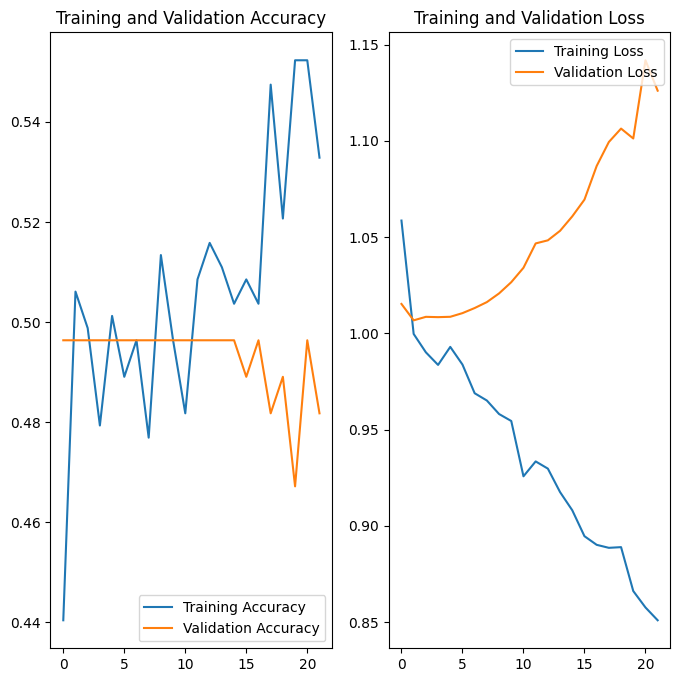

In [93]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Guardar modelo

In [21]:
model.save('rps_model.h5')

## Script 3

### Librerias

In [116]:
rps_model = tf.keras.models.load_model('rps_model.h5')

In [ ]:
import cv2
import time
import numpy as np
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import tensorflow as tf

# Cargar modelo entrenado
modelo = tf.keras.models.load_model("rps_model.h5")

# Clases
clases = ["Piedra", "Papel", "Tijera"]

# Iniciar MediaPipe Task
base_options = python.BaseOptions(model_asset_path='c:/models/model.task')
options = vision.HandLandmarkerOptions(base_options=base_options, num_hands=1)
detector = vision.HandLandmarker.create_from_options(options)

# Para dibujar
# mp_drawing = mp.solutions.drawing_utils
# mp_hands = mp.solutions.hands  # solo para conexiones

# Iniciar webcam
cap = cv2.VideoCapture(0)

print("--- Instrucciones ---")
print("Presiona 'q' para salir.")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Error al capturar frame.")
        break

    frame = cv2.flip(frame, 1)  # espejo
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Crear imagen de MediaPipe
    mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=rgb)
    result = detector.detect(mp_image)

    prediccion = None

    if result.hand_landmarks:
        landmarks = result.hand_landmarks[0]  # 21 puntos

        # Extraer x, y
        entrada = np.array([coord for lm in landmarks for coord in (lm.x, lm.y)])
        entrada = np.expand_dims(entrada, axis=0)  # (1, 42)

        salida = modelo.predict(entrada, verbose=0)
        clase_idx = np.argmax(salida)
        prediccion = clases[clase_idx]
        print(prediccion, salida)
        # Dibujar los landmarks
        # mp_drawing.draw_landmarks(frame, result.hand_landmarks[0], mp_hands.HAND_CONNECTIONS)

    # Mostrar resultado
    if prediccion:
        cv2.putText(frame, f"Eleccion: {prediccion}", (10, 40),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    cv2.imshow("Piedra, Papel o Tijera", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
